# 20-1705150260-opg.jpg

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [2]:
image = cv2.imread('20-1705150260-opg.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

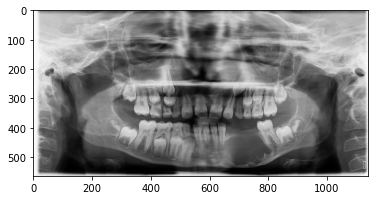

In [3]:
plt.imshow(image)

In [40]:
image = cv2.imread('20-1705150260-opg.jpg',0)
ROI = image[210:520,280:920]

In [41]:
mean, STD  = cv2.meanStdDev(ROI)

# Clip frame to lower and upper STD
offset = 1.4
clipped = np.clip(ROI, mean - offset*STD, mean + offset*STD).astype(np.uint8)

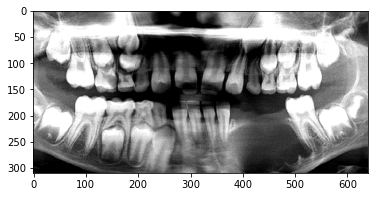

In [42]:
#norm_img = np.zeros((100,800))
final_img = cv2.normalize(clipped,  clipped, 0, 255, cv2.NORM_MINMAX,dtype=cv2.CV_32F)
plt.imshow(final_img,cmap = 'gray')

In [43]:
hsv = cv2.cvtColor(final_img, cv2.COLOR_BGR2HSV)

error: OpenCV(4.3.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x3b52564f::Set<3,-1,-1>,struct cv::impl::A0x3b52564f::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [44]:
import matplotlib.pyplot as plt
import numpy as np

def generate_histogram(img, do_print):
    """
    @params: img: can be a grayscale or color image. We calculate the Normalized histogram of this image.
    @params: do_print: if or not print the result histogram
    @return: will return both histogram and the grayscale image 
    """
    if len(img.shape) == 3: # img is colorful, so we convert it to grayscale
        gr_img = np.mean(img, axis=-1)
    else:
        gr_img = img
    '''now we calc grayscale histogram'''
    gr_hist = np.zeros([256])

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
            
    '''normalizing the Histogram'''
    gr_hist /= (gr_img.shape[0] * gr_img.shape[1])
    if do_print:
        print_histogram(gr_hist, title="Normalized Histogram")
    return gr_hist, gr_img
  
def print_histogram(_histrogram,title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_")

    


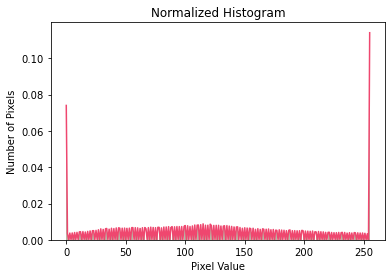

In [45]:
hist_img, gr_img = generate_histogram(final_img,True)

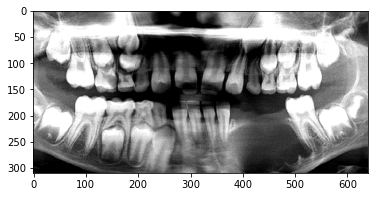

In [46]:
plt.imshow(gr_img,cmap = 'gray')

In [47]:
def print_img(img, histo_new, histo_old, L):
    dpi = 80
    width = img.shape[0]
    height = img.shape[1]
    if height > width:
        figsize = (img.shape[0]*4) / float(dpi), (height)/ float(dpi)
        fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1,1]}, figsize=figsize)
    else:
        figsize = (width) / float(dpi), (height*4) / float(dpi)
        fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1,1]}, figsize=figsize)

    fig.suptitle("Enhanced Image with L:" + str(L))
    axs[0].title.set_text("Enhanced Image")
    axs[0].imshow(img, vmin=np.amin(img), vmax=np.amax(img), cmap='gray')

    axs[1].title.set_text("Equalized histogram")
    axs[1].plot(histo_new, color='#f77f00')
    axs[1].bar(np.arange(len(histo_new)), histo_new, color='#003049')

    axs[2].title.set_text("Main histogram")
    axs[2].plot(histo_old, color='#ef476f')
    axs[2].bar(np.arange(len(histo_old)), histo_old, color='#b7b7a4')
    plt.tight_layout()
    #plt.savefig("e" + str(L)+".pdf")
    #plt.savefig("e" + str(L)+".png")

In [48]:
def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo,title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, do_print=False)
    print_img(img=en_img, histo_new=hist_img, histo_old=histo, L=L)
    #plt.imshow(en_img,cmap = 'gray')
    return eq_histo,en_img


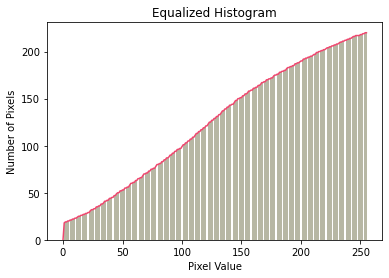

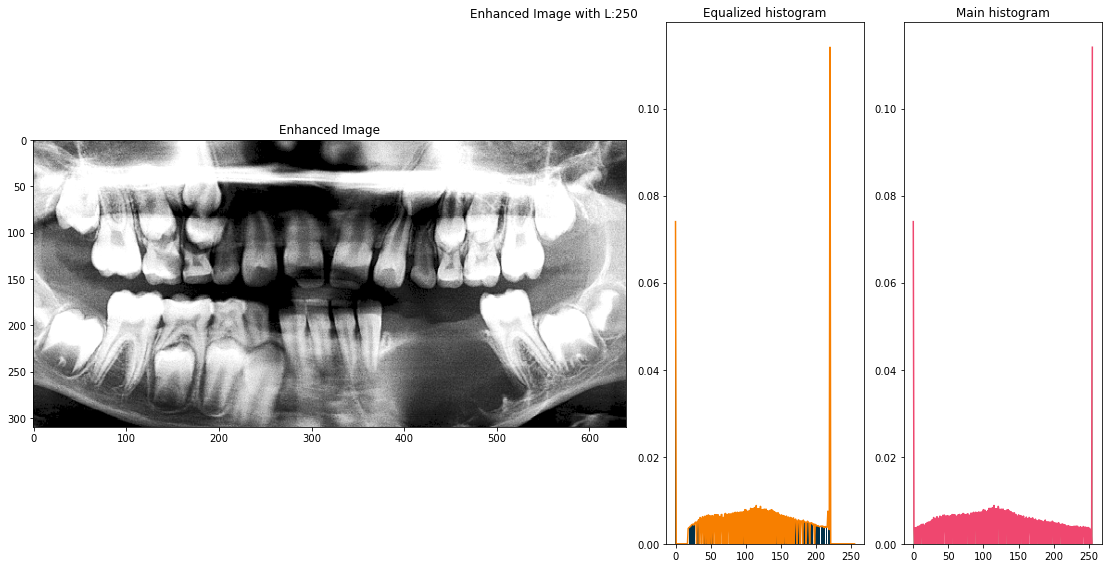

In [49]:
hist0, image_histo = equalize_histogram(gr_img, hist_img, 250)

True

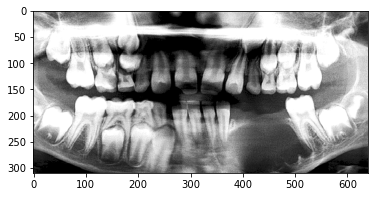

In [51]:
plt.imshow(image_histo,cmap = 'gray')
cv2.imwrite(r"C:\Users\KIIT\Downloads\histo_images\20-1705150260-opg_histo.png",image_histo)

In [122]:
img  = cv2.imread("image_histo.png")
hsv = cv2.cvtColor(image_histo, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

error: OpenCV(4.3.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x3b52564f::Set<3,-1,-1>,struct cv::impl::A0x3b52564f::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


Shape: (1050, 2850)


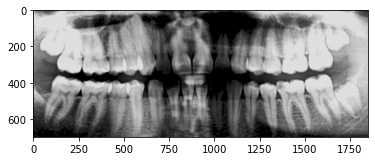

In [124]:
img  = cv2.imread("image_histo.png")
print("Shape: {}".format(image.shape))
plt.imshow(img)

In [125]:
plt.imshow(cv2.resize(img, (1050, 2850,3))) 

TypeError: function takes exactly 2 arguments (3 given)

   #2017020.png

In [52]:
image = cv2.imread('2017020.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

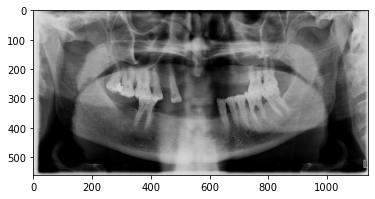

In [53]:
plt.imshow(image)

In [81]:
image = cv2.imread('2017020.png',0)
ROI = image[150:400,240:900]

In [82]:
mean, STD  = cv2.meanStdDev(ROI)

# Clip frame to lower and upper STD
offset = 1.4
clipped = np.clip(ROI, mean - offset*STD, mean + offset*STD).astype(np.uint8)

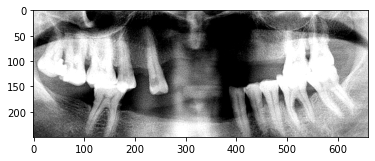

In [83]:
#norm_img = np.zeros((100,800))
final_img = cv2.normalize(clipped,  clipped, 0, 255, cv2.NORM_MINMAX,dtype=cv2.CV_32F)
plt.imshow(final_img,cmap = 'gray')

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def generate_histogram(img, do_print):
    """
    @params: img: can be a grayscale or color image. We calculate the Normalized histogram of this image.
    @params: do_print: if or not print the result histogram
    @return: will return both histogram and the grayscale image 
    """
    if len(img.shape) == 3: # img is colorful, so we convert it to grayscale
        gr_img = np.mean(img, axis=-1)
    else:
        gr_img = img
    '''now we calc grayscale histogram'''
    gr_hist = np.zeros([256])

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
            
    '''normalizing the Histogram'''
    gr_hist /= (gr_img.shape[0] * gr_img.shape[1])
    if do_print:
        print_histogram(gr_hist, title="Normalized Histogram")
    return gr_hist, gr_img
  
def print_histogram(_histrogram,title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_")

    


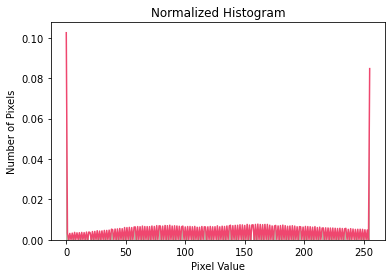

In [85]:
hist_img, gr_img = generate_histogram(final_img,True)

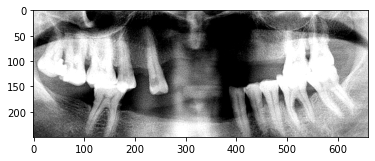

In [86]:
plt.imshow(gr_img,cmap = 'gray')

In [87]:
def print_img(img, histo_new, histo_old, L):
    dpi = 80
    width = img.shape[0]
    height = img.shape[1]
    if height > width:
        figsize = (img.shape[0]*4) / float(dpi), (height)/ float(dpi)
        fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1,1]}, figsize=figsize)
    else:
        figsize = (width) / float(dpi), (height*4) / float(dpi)
        fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1,1]}, figsize=figsize)

    fig.suptitle("Enhanced Image with L:" + str(L))
    axs[0].title.set_text("Enhanced Image")
    axs[0].imshow(img, vmin=np.amin(img), vmax=np.amax(img), cmap='gray')

    axs[1].title.set_text("Equalized histogram")
    axs[1].plot(histo_new, color='#f77f00')
    axs[1].bar(np.arange(len(histo_new)), histo_new, color='#003049')

    axs[2].title.set_text("Main histogram")
    axs[2].plot(histo_old, color='#ef476f')
    axs[2].bar(np.arange(len(histo_old)), histo_old, color='#b7b7a4')
    plt.tight_layout()
    #plt.savefig("e" + str(L)+".pdf")
    #plt.savefig("e" + str(L)+".png")

In [88]:
def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo,title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, do_print=False)
    print_img(img=en_img, histo_new=hist_img, histo_old=histo, L=L)
    #plt.imshow(en_img,cmap = 'gray')
    return eq_histo,en_img

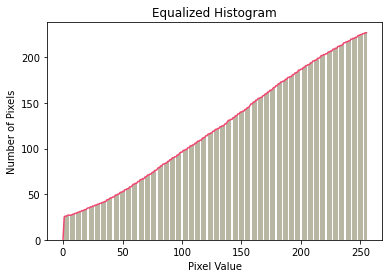

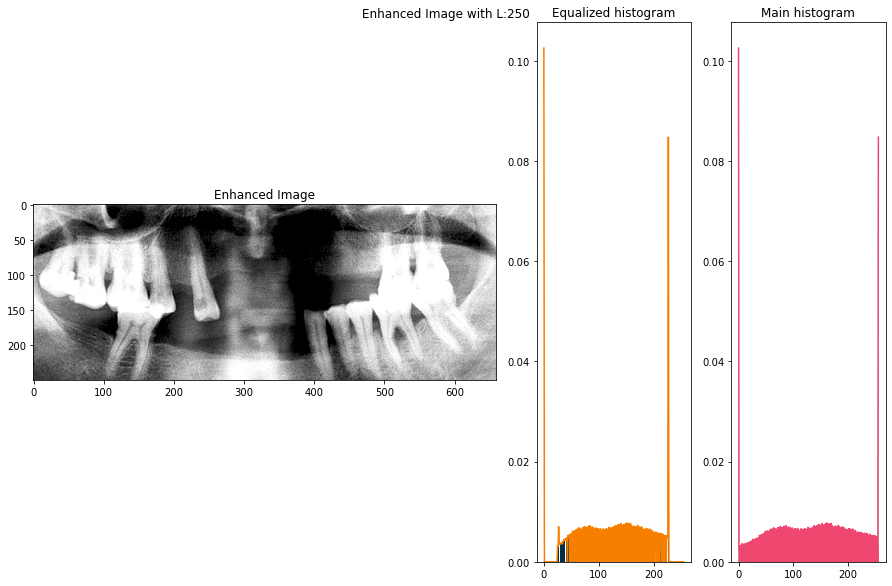

In [89]:
hist0, image_histo = equalize_histogram(gr_img, hist_img, 250)

True

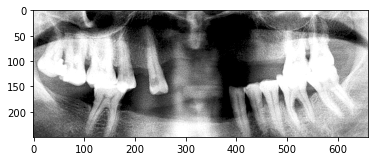

In [90]:
plt.imshow(image_histo,cmap = 'gray')
cv2.imwrite(r"C:\Users\KIIT\Downloads\histo_images\2017020_histo.png",image_histo)

# 20105150012-opg.jpg

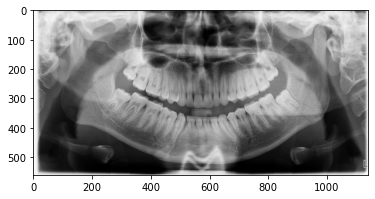

In [73]:
image = cv2.imread('20105150012-opg.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

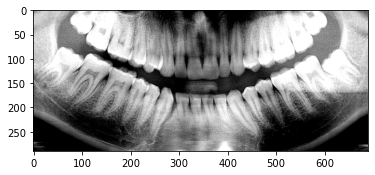

In [99]:
image = cv2.imread('20105150012-opg.jpg',0)
ROI = image[190:480,230:920]
mean, STD  = cv2.meanStdDev(ROI)

# Clip frame to lower and upper STD
offset = 1.4
clipped = np.clip(ROI, mean - offset*STD, mean + offset*STD).astype(np.uint8)

#norm_img = np.zeros((100,800))
final_img = cv2.normalize(clipped,  clipped, 0, 255, cv2.NORM_MINMAX,dtype=cv2.CV_32F)
plt.imshow(final_img,cmap = 'gray')

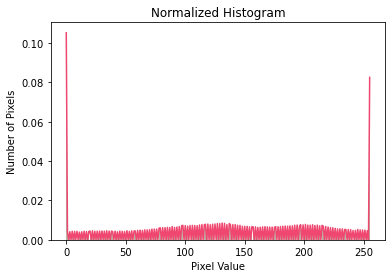

In [100]:
import matplotlib.pyplot as plt
import numpy as np

def generate_histogram(img, do_print):
    """
    @params: img: can be a grayscale or color image. We calculate the Normalized histogram of this image.
    @params: do_print: if or not print the result histogram
    @return: will return both histogram and the grayscale image 
    """
    if len(img.shape) == 3: # img is colorful, so we convert it to grayscale
        gr_img = np.mean(img, axis=-1)
    else:
        gr_img = img
    '''now we calc grayscale histogram'''
    gr_hist = np.zeros([256])

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
            
    '''normalizing the Histogram'''
    gr_hist /= (gr_img.shape[0] * gr_img.shape[1])
    if do_print:
        print_histogram(gr_hist, title="Normalized Histogram")
    return gr_hist, gr_img
  
def print_histogram(_histrogram,title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_")

    
    
hist_img, gr_img = generate_histogram(final_img,True)

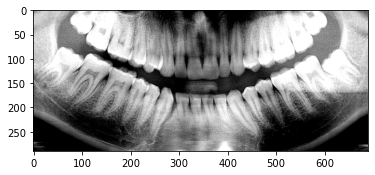

In [101]:
plt.imshow(gr_img,cmap = 'gray')

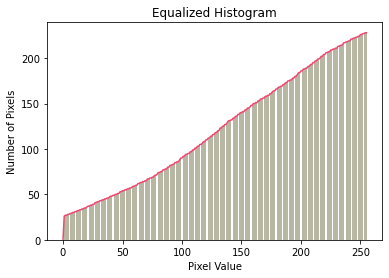

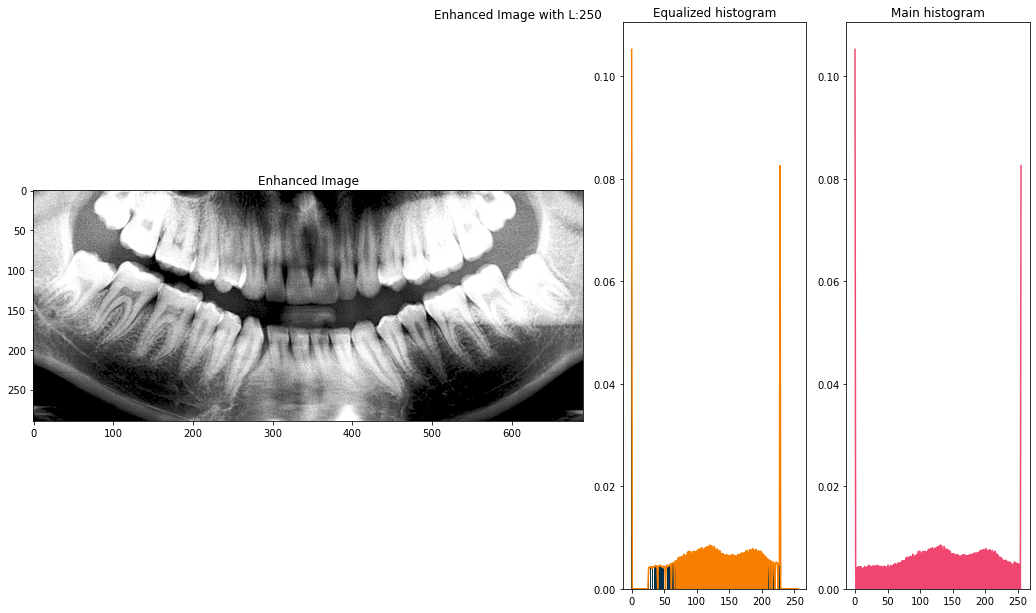

In [102]:
def print_img(img, histo_new, histo_old, L):
    dpi = 80
    width = img.shape[0]
    height = img.shape[1]
    if height > width:
        figsize = (img.shape[0]*4) / float(dpi), (height)/ float(dpi)
        fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1,1]}, figsize=figsize)
    else:
        figsize = (width) / float(dpi), (height*4) / float(dpi)
        fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1,1]}, figsize=figsize)

    fig.suptitle("Enhanced Image with L:" + str(L))
    axs[0].title.set_text("Enhanced Image")
    axs[0].imshow(img, vmin=np.amin(img), vmax=np.amax(img), cmap='gray')

    axs[1].title.set_text("Equalized histogram")
    axs[1].plot(histo_new, color='#f77f00')
    axs[1].bar(np.arange(len(histo_new)), histo_new, color='#003049')

    axs[2].title.set_text("Main histogram")
    axs[2].plot(histo_old, color='#ef476f')
    axs[2].bar(np.arange(len(histo_old)), histo_old, color='#b7b7a4')
    plt.tight_layout()
    #plt.savefig("e" + str(L)+".pdf")
    #plt.savefig("e" + str(L)+".png")
    

def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo,title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, do_print=False)
    print_img(img=en_img, histo_new=hist_img, histo_old=histo, L=L)
    #plt.imshow(en_img,cmap = 'gray')
    return eq_histo,en_img

hist0, image_histo = equalize_histogram(gr_img, hist_img, 250)

True

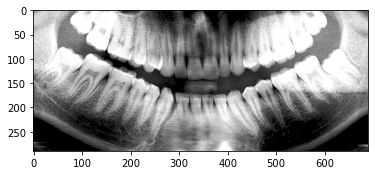

In [103]:
plt.imshow(image_histo,cmap = 'gray')
cv2.imwrite(r"C:\Users\KIIT\Downloads\histo_images\20105150012-opg_histo.png",image_histo)

 # 201312120244 opg.jpg

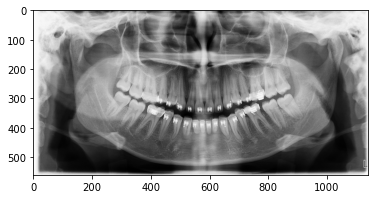

In [104]:
image = cv2.imread('201312120244 opg.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

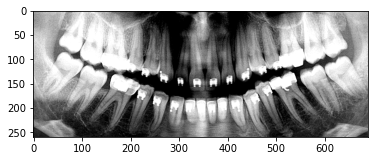

In [106]:
image = cv2.imread('201312120244 opg.jpg',0)
ROI = image[190:450,230:920]
mean, STD  = cv2.meanStdDev(ROI)

# Clip frame to lower and upper STD
offset = 1.4
clipped = np.clip(ROI, mean - offset*STD, mean + offset*STD).astype(np.uint8)

#norm_img = np.zeros((100,800))
final_img = cv2.normalize(clipped,  clipped, 0, 255, cv2.NORM_MINMAX,dtype=cv2.CV_32F)
plt.imshow(final_img,cmap = 'gray')

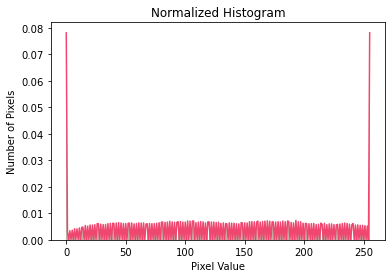

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def generate_histogram(img, do_print):
    """
    @params: img: can be a grayscale or color image. We calculate the Normalized histogram of this image.
    @params: do_print: if or not print the result histogram
    @return: will return both histogram and the grayscale image 
    """
    if len(img.shape) == 3: # img is colorful, so we convert it to grayscale
        gr_img = np.mean(img, axis=-1)
    else:
        gr_img = img
    '''now we calc grayscale histogram'''
    gr_hist = np.zeros([256])

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
            
    '''normalizing the Histogram'''
    gr_hist /= (gr_img.shape[0] * gr_img.shape[1])
    if do_print:
        print_histogram(gr_hist, title="Normalized Histogram")
    return gr_hist, gr_img
  
def print_histogram(_histrogram,title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_")

    
    
hist_img, gr_img = generate_histogram(final_img,True)

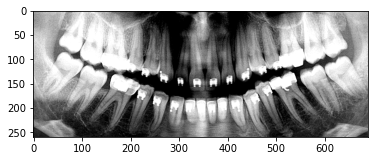

In [108]:
plt.imshow(gr_img,cmap = 'gray')

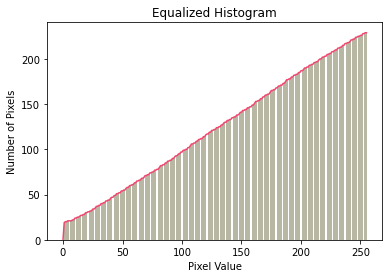

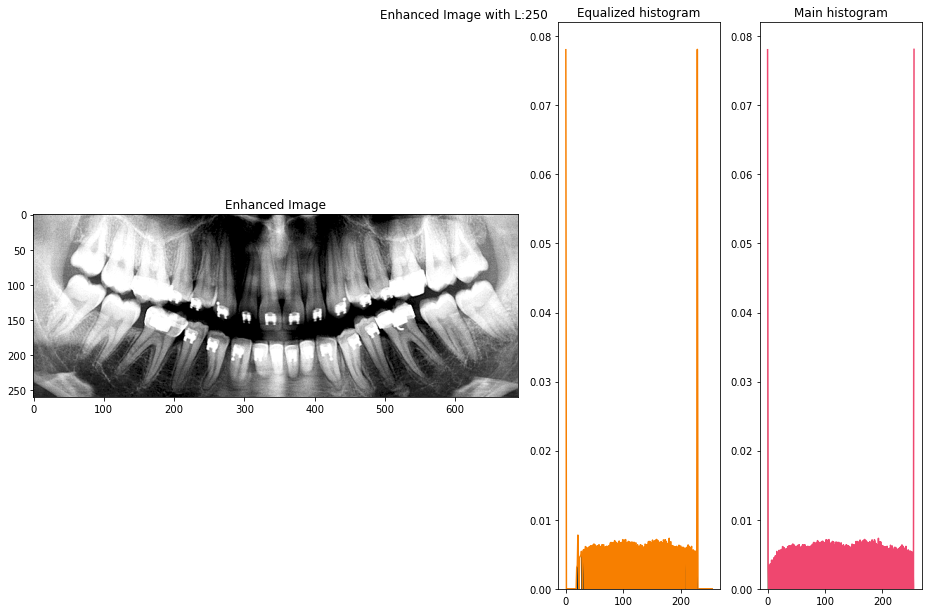

In [109]:
def print_img(img, histo_new, histo_old, L):
    dpi = 80
    width = img.shape[0]
    height = img.shape[1]
    if height > width:
        figsize = (img.shape[0]*4) / float(dpi), (height)/ float(dpi)
        fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1,1]}, figsize=figsize)
    else:
        figsize = (width) / float(dpi), (height*4) / float(dpi)
        fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1,1]}, figsize=figsize)

    fig.suptitle("Enhanced Image with L:" + str(L))
    axs[0].title.set_text("Enhanced Image")
    axs[0].imshow(img, vmin=np.amin(img), vmax=np.amax(img), cmap='gray')

    axs[1].title.set_text("Equalized histogram")
    axs[1].plot(histo_new, color='#f77f00')
    axs[1].bar(np.arange(len(histo_new)), histo_new, color='#003049')

    axs[2].title.set_text("Main histogram")
    axs[2].plot(histo_old, color='#ef476f')
    axs[2].bar(np.arange(len(histo_old)), histo_old, color='#b7b7a4')
    plt.tight_layout()
    #plt.savefig("e" + str(L)+".pdf")
    #plt.savefig("e" + str(L)+".png")
    

def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo,title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, do_print=False)
    print_img(img=en_img, histo_new=hist_img, histo_old=histo, L=L)
    #plt.imshow(en_img,cmap = 'gray')
    return eq_histo,en_img

hist0, image_histo = equalize_histogram(gr_img, hist_img, 250)

True

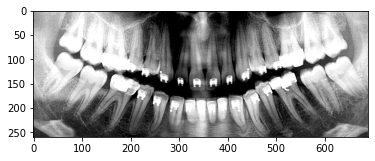

In [110]:
plt.imshow(image_histo,cmap = 'gray')
cv2.imwrite(r"C:\Users\KIIT\Downloads\histo_images\201312120244 opg.jpg_histo.png",image_histo)

# 201407120151-opg.jpg

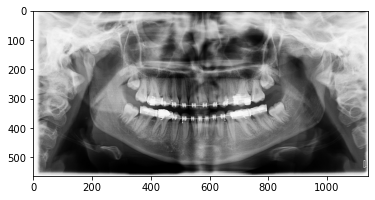

In [111]:
image = cv2.imread('201407120151-opg.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

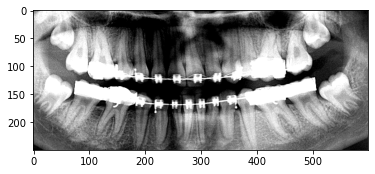

In [117]:
image = cv2.imread('201407120151-opg.jpg',0)
ROI = image[200:450,290:890]
mean, STD  = cv2.meanStdDev(ROI)

# Clip frame to lower and upper STD
offset = 1.4
clipped = np.clip(ROI, mean - offset*STD, mean + offset*STD).astype(np.uint8)

#norm_img = np.zeros((100,800))
final_img = cv2.normalize(clipped,  clipped, 0, 255, cv2.NORM_MINMAX,dtype=cv2.CV_32F)
plt.imshow(final_img,cmap = 'gray')

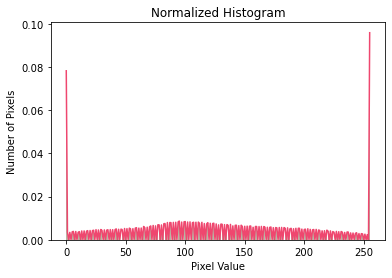

In [118]:
import matplotlib.pyplot as plt
import numpy as np

def generate_histogram(img, do_print):
    """
    @params: img: can be a grayscale or color image. We calculate the Normalized histogram of this image.
    @params: do_print: if or not print the result histogram
    @return: will return both histogram and the grayscale image 
    """
    if len(img.shape) == 3: # img is colorful, so we convert it to grayscale
        gr_img = np.mean(img, axis=-1)
    else:
        gr_img = img
    '''now we calc grayscale histogram'''
    gr_hist = np.zeros([256])

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
            
    '''normalizing the Histogram'''
    gr_hist /= (gr_img.shape[0] * gr_img.shape[1])
    if do_print:
        print_histogram(gr_hist, title="Normalized Histogram")
    return gr_hist, gr_img
  
def print_histogram(_histrogram,title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_")

    
    
hist_img, gr_img = generate_histogram(final_img,True)

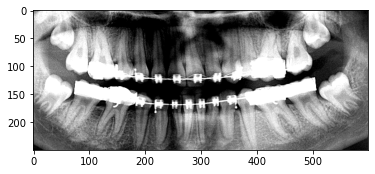

In [119]:
plt.imshow(gr_img,cmap = 'gray')

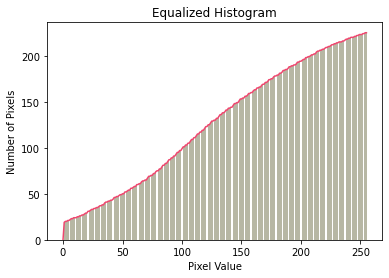

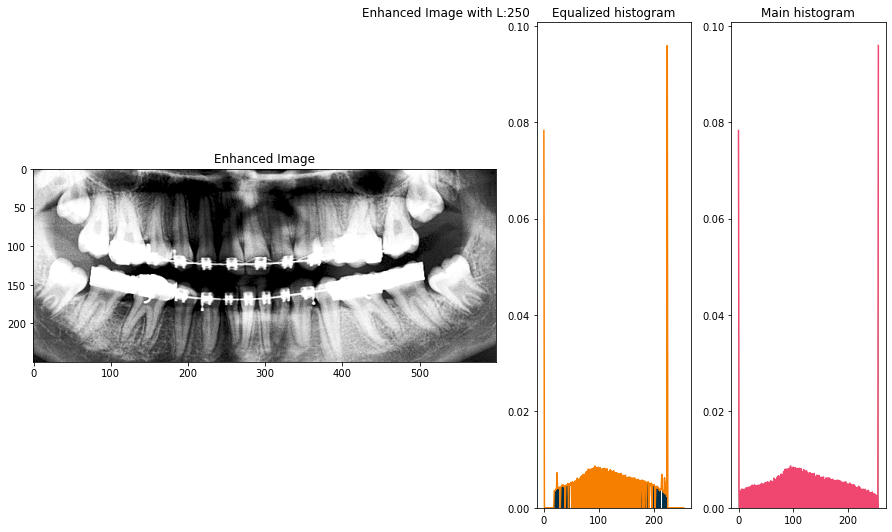

In [120]:
def print_img(img, histo_new, histo_old, L):
    dpi = 80
    width = img.shape[0]
    height = img.shape[1]
    if height > width:
        figsize = (img.shape[0]*4) / float(dpi), (height)/ float(dpi)
        fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1,1]}, figsize=figsize)
    else:
        figsize = (width) / float(dpi), (height*4) / float(dpi)
        fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1,1]}, figsize=figsize)

    fig.suptitle("Enhanced Image with L:" + str(L))
    axs[0].title.set_text("Enhanced Image")
    axs[0].imshow(img, vmin=np.amin(img), vmax=np.amax(img), cmap='gray')

    axs[1].title.set_text("Equalized histogram")
    axs[1].plot(histo_new, color='#f77f00')
    axs[1].bar(np.arange(len(histo_new)), histo_new, color='#003049')

    axs[2].title.set_text("Main histogram")
    axs[2].plot(histo_old, color='#ef476f')
    axs[2].bar(np.arange(len(histo_old)), histo_old, color='#b7b7a4')
    plt.tight_layout()
    #plt.savefig("e" + str(L)+".pdf")
    #plt.savefig("e" + str(L)+".png")
    

def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo,title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, do_print=False)
    print_img(img=en_img, histo_new=hist_img, histo_old=histo, L=L)
    #plt.imshow(en_img,cmap = 'gray')
    return eq_histo,en_img

hist0, image_histo = equalize_histogram(gr_img, hist_img, 250)

True

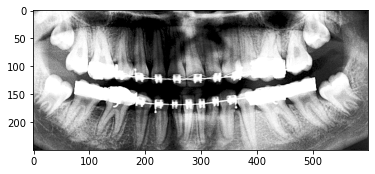

In [121]:
plt.imshow(image_histo,cmap = 'gray')
cv2.imwrite(r"C:\Users\KIIT\Downloads\histo_images\201407120151-opg_histo.png",image_histo)